## 1.0 Introduction

The main objective of this feature is create checkoints in all functions to facilitate the debug process and identify what function broke. Basicaly this feature revolve around the `class` `LocalStateHandler` that is responsible for writing and reading the contents of the state of a program (i.e. a set of small variables) into and from a file in the local filesystem, the state is defined as a dictionary and it is serialized in the file with the *Dill* library. For more information check the docstring class. Above you can find how this feature works. Enjoy!!


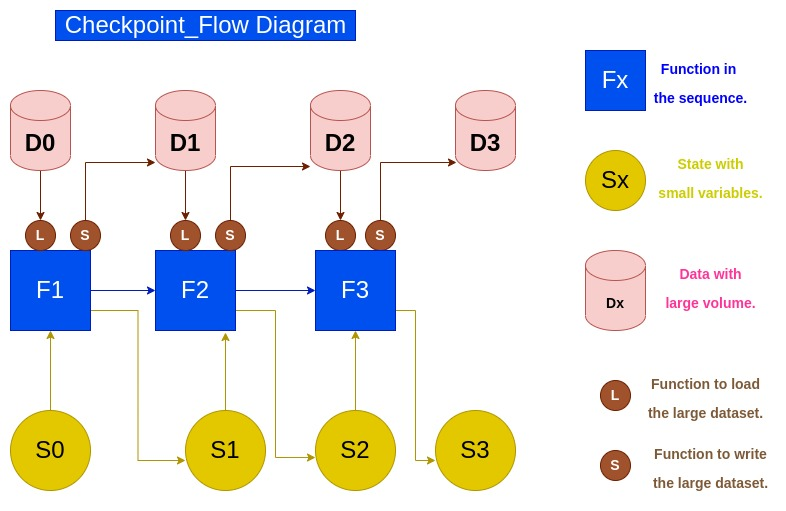

## 1.1 Import modules

In [1]:
from gumly.checkpoint_flow import CheckpointFlow

## 1.2 Telling a History

Imagine you are writing three code procedures to run, all of them are heavy and take some time to run. They might load large amounts of data and write them down as well.

### Step 1 -  Calling the Class CheckpointFlow and Serializing 

In [2]:
cp = CheckpointFlow("checkpoint.pkl", handler='local')

###  step 2 - Create the inicial state

#### We have some initial variables values that are necessary for the first procedure:

In [3]:
initial_state = dict(a='value of A')

### Step - 3 Starting the function loader and Save

####  We write the code to load and save the large datasets separetely.

In [4]:
def loader(state):
    print("loader")
    return {'x': [1, 2, 3]}

def saver(state, data):
    print(f"saver printing data={data}")
    
def loader3(state):
    print("loader3")
    return {'z': ['A', 'B', 'C']}

def saver3(state, data):
    print(f"saver3 printing data={data}")

### Step 4 - Wrap and add the decorator

#### These are the procedures, which are wraped and added to the sequence of the flow with the decorator      `add_step`:

In [5]:
@cp.add_step(load=loader, save=saver)
def f1(state, data):
    print(f"f1 printing state: {state}")
    print(f"f1 printing data: {data}")
    state['d'] = 'D'

@cp.add_step()
def f2(state, data):
    raise Exception("This thing broke!")

@cp.add_step(load=loader3, save=saver3)
def f3(state, data):
    print(f"f3 printing state: {state}")
    print(f"f3 printing data: {data}")
    state['c'] = 4.5

### Step 5 - Execute with Checkpoint Flow

In [6]:
cp.run(initial_state)

loader
f1 printing state: {'a': 'value of A'}
f1 printing data: {'x': [1, 2, 3]}
saver printing data={'x': [1, 2, 3]}


Exception: This thing broke!

####  Look!!! We Know now what function broke let's fix it now.  

### Step 6 - Fix and Run Again. 

In [ ]:
cp = CheckpointFlow("checkpoint.pkl", handler='local')

@cp.add_step(load=loader, save=saver)
def f1(state, data):
    print(f"f1 printing state: {state}")
    print(f"f1 printing data: {data}")
    state['d'] = 'D'

# the fixed function
@cp.add_step()
def f2(state, data):
    print(f"f2 printing state: {state}")
    print(f"f2 printing data: {data}")

@cp.add_step(load=loader3, save=saver3)
def f3(state, data):
    print(f"f3 printing state: {state}")
    print(f"f3 printing data: {data}")
    state['c'] = 4.5

#### Now, let's run everything again:

In [ ]:
cp.run(initial_state)

#### Notice that the code started from f2, instead of f1 this time. If we run it again, it will start from the beggining, this is the magic of this feature!!!!

In [ ]:
cp = CheckpointFlow("checkpoint.pkl", handler='local')

@cp.add_step(load=loader, save=saver)
def f1(state, data):
    print(f"f1 printing state: {state}")
    print(f"f1 printing data: {data}")
    state['d'] = 'D'

# the fixed function
@cp.add_step()
def f2(state, data):
    print(f"f2 printing state: {state}")
    print(f"f2 printing data: {data}")

@cp.add_step(load=loader3, save=saver3)
def f3(state, data):
    print(f"f3 printing state: {state}")
    print(f"f3 printing data: {data}")
    state['c'] = 4.5
    
cp.run(initial_state)

#### If we want to run every loader function, we can set the loading policy:

In [ ]:
cp.run(initial_state, load_policy='always')

#### If we want to start from a specfic point, even if nothing broke, we just need to pass the checkpoint index to the `run` method:

In [ ]:
cp.run(initial_state, checkpoint=1)

## 2.0 Conclusion and library advantages

This implementation is an advantage because you might execute many functions and if it broke you will know exactly function you have to fix.  

## Reference

[functools](https://docs.python.org/3/library/functools.html)

[dill](https://pypi.org/project/dill/)